In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [315]:
train_data = pd.read_csv('D:/codsoft/Frauddetection/fraudTrain.csv')
test_data = pd.read_csv('D:/codsoft/Frauddetection/fraudTest.csv')

In [316]:
train_data.shape
#23 columns , 1296675 cols

(1296675, 23)

In [317]:
test_data.shape

(555719, 23)

In [95]:
train_data.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [96]:
train_data.tail(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1296665,1296665,2020-06-21 12:08:42,213193596103206,fraud_Gulgowski LLC,home,72.17,James,Hunt,M,7369 Gabriel Tunnel,...,45.7549,-84.4470,95,Electrical engineer,1994-02-09,108c103b26f686c24c021aaf4210977e,1371816522,44.938461,-83.996234,0
1296666,1296666,2020-06-21 12:09:22,4587657402165341815,"fraud_Hyatt, Russel and Gleichner",health_fitness,7.30,Amber,Lewis,F,6296 John Keys Suite 858,...,41.0646,-87.5917,2135,"Psychotherapist, child",2004-05-08,37a18c6fb0c5c722b6339ffedc82f55a,1371816562,40.556811,-88.092339,0
1296667,1296667,2020-06-21 12:10:56,4822367783500458,"fraud_Hahn, Douglas and Schowalter",travel,19.71,Christopher,Farrell,M,97070 Anderson Land,...,28.0758,-81.5929,33804,Exercise physiologist,1991-01-01,34e72e0a659a6c8f4a20ee65594f3a7d,1371816656,27.465871,-81.511804,0
1296668,1296668,2020-06-21 12:11:23,213141712584544,"fraud_Metz, Russel and Metz",kids_pets,100.85,Margaret,Curtis,F,742 Oneill Shore,...,32.1530,-90.1217,19685,Fine artist,1984-12-24,0d86d8c17638d7eff77db9c6a878b477,1371816683,31.377697,-90.528450,0
1296669,1296669,2020-06-21 12:11:36,4400011257587661852,fraud_Stiedemann Inc,misc_pos,37.38,Marissa,Powell,F,474 Allen Haven,...,41.4972,-98.7858,509,"Nurse, children's",1980-09-15,9a7ea2625cf8303efe34e3c09546868f,1371816696,41.728638,-99.039660,0
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,...,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0


In [97]:
#Detecting imbalance


In [100]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [101]:
train_data.isnull().sum()
test_data.isnull().sum()
#dataset is clean from missing values

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [105]:
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])
train_data['trans_date_trans_time']

0         2019-01-01 00:00:18
1         2019-01-01 00:00:44
2         2019-01-01 00:00:51
3         2019-01-01 00:01:16
4         2019-01-01 00:03:06
                  ...        
1296670   2020-06-21 12:12:08
1296671   2020-06-21 12:12:19
1296672   2020-06-21 12:12:32
1296673   2020-06-21 12:13:36
1296674   2020-06-21 12:13:37
Name: trans_date_trans_time, Length: 1296675, dtype: datetime64[ns]

In [106]:
train_data['transaction_date'] = train_data.trans_date_trans_time.dt.strftime('%Y-%m-%d')
train_data['transaction_hour'] = train_data.trans_date_trans_time.dt.strftime('%H')
train_data['transaction_month'] = train_data.trans_date_trans_time.dt.strftime('%m')

In [107]:
train_data = train_data.drop('Unnamed: 0',axis = 1)

In [108]:
train_data

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,transaction_date,transaction_hour,transaction_month
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,00,01
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,00,01
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,00,01
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,00,01
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,00,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,2020-06-21,12,06
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,2020-06-21,12,06
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,2020-06-21,12,06
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,2020-06-21,12,06


In [109]:
col_long = train_data['merch_long'] - train_data['long']
col_lat = train_data['merch_lat'] - train_data['lat']
final_dis = np.sqrt(col_long**2 + col_lat**2)

In [110]:
train_data['total_dis'] = final_dis

In [111]:
train_data.drop(['merch_long','merch_lat','long','lat'],axis = 1,inplace=True)
train_data

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,is_fraud,transaction_date,transaction_hour,transaction_month,total_dis
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,0,2019-01-01,00,01,0.872830
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,0,2019-01-01,00,01,0.272310
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,0,2019-01-01,00,01,0.975845
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,0,2019-01-01,00,01,0.919802
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,0,2019-01-01,00,01,0.868505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,0,2020-06-21,12,06,1.177732
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,0,2020-06-21,12,06,0.819632
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,0,2020-06-21,12,06,0.967541
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,0,2020-06-21,12,06,0.898775


In [112]:
train_data['dob'] = pd.to_datetime(train_data['dob'])
train_data['birthday_date'] = train_data['dob'].dt.strftime('%Y-%m-%d')
train_data['age'] = (pd.to_datetime(train_data['transaction_date']) - pd.to_datetime(train_data['dob'])).astype('timedelta64[Y]')

In [113]:
train_data['age']

0          30.0
1          40.0
2          56.0
3          51.0
4          32.0
           ... 
1296670    58.0
1296671    40.0
1296672    52.0
1296673    39.0
1296674    24.0
Name: age, Length: 1296675, dtype: float64

In [114]:
print(train_data['age'].min(), train_data['age'].max())

13.0 95.0


In [115]:
def plot_ages_vs_fraud():
    y_fraud = []
    train_data['age']
    ages = train_data['age'].unique()
    for age in ages:
        y_fraud.append(len(train_data[np.logical_and(train_data['age'] == age , train_data['is_fraud'] == 1)]['age']))
    plt.scatter(ages,y_fraud)

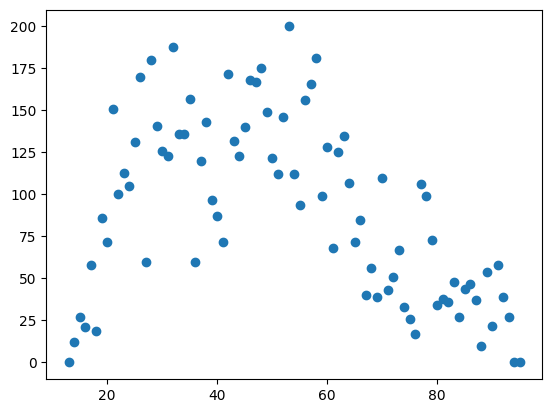

In [116]:
plot_ages_vs_fraud() #there is correlation between age and fraud

# EDA Visualization

In [117]:
def plot_gender_vs_fraud():
    g = sns.countplot(y = 'city',
                    data=new_train_data[new_train_data['is_fraud'] == 1], 
                    hue='gender',
                    width=0.8,
                    order=new_train_data.city.value_counts(sort=True, ascending=False).head(10).index)

    # Set title, label, legend 
    g.set_title('Top 10 cities in Number of fraud vs Gender', fontdict = { 'fontsize': 16, 'fontweight':'bold'})
    g.set_xlabel('Count', fontsize=15, fontweight='bold')
    g.set_ylabel('City', fontsize=15, fontweight='bold')
    g.legend(prop={'weight':'bold'})

    # Show plot
    plt.show()

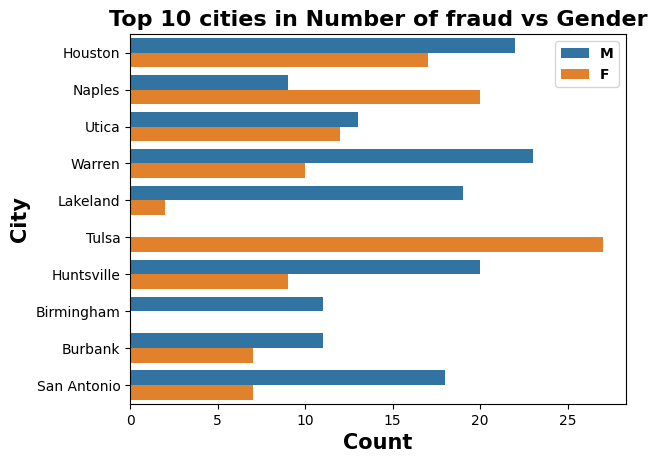

In [118]:
plot_gender_vs_fraud()

In [119]:
def plot_male_vs_female():
    frame_fraud = new_train_data[new_train_data['is_fraud'] == 1]
    count_male = len(frame_fraud[frame_fraud['gender'] == "M"]['gender'])
    count_female = len(frame_fraud[frame_fraud['gender'] == "F"]['gender'])
    total_male = len(new_train_data[new_train_data['gender']=="M"])
    total_female = len(new_train_data[new_train_data['gender']=="F"])
    fig, ax = plt.subplots(1,3,figsize=(18,4))
    ax[0].barh(["male","female"],[count_male,count_female])
    ax[1].barh(["male","female"],[total_male,total_female])
    ax[2].barh(["male","female"],[count_male/total_male,count_female/total_female])
    for i in range(3):
        ax[i].bar_label(ax[i].containers[0], label_type='edge')   
    ax[0].set_xlim(3600,3900)
    ax[1].set_xlim(5000,8000)


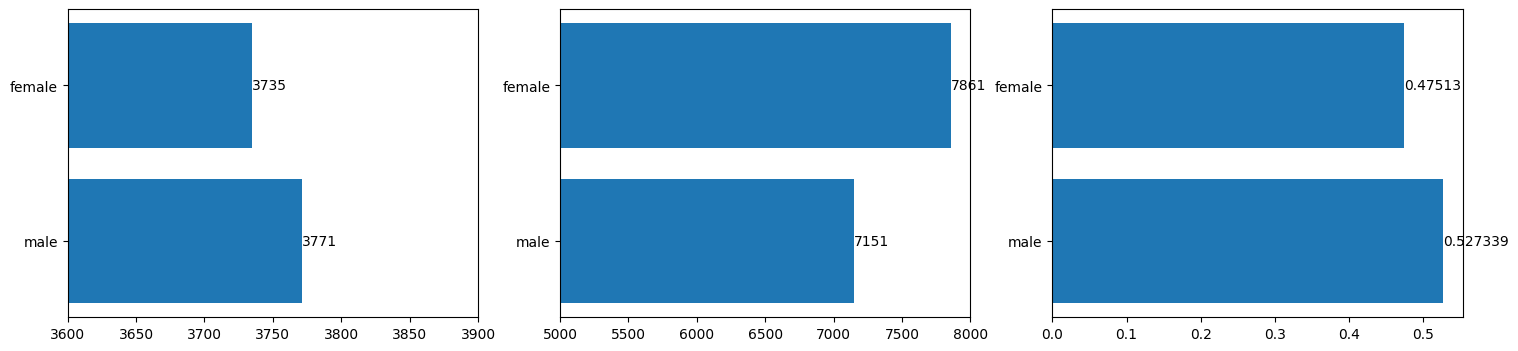

In [120]:
plot_male_vs_female()

In [121]:
def plot_category_vs_fraud():
    m = sns.countplot(y=new_train_data['category'],
                      data = new_train_data[new_train_data['is_fraud'] == 1],
                      hue = new_train_data['gender'],
                      order = new_train_data[new_train_data['is_fraud'] == 1]['category'].value_counts().index)
    plt.show()

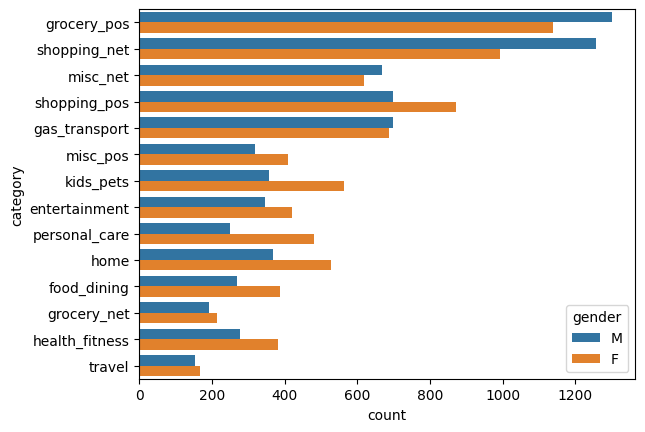

In [122]:
plot_category_vs_fraud()

In [123]:

def plot_age_again():
    fig,ax = plt.subplots(figsize=(16,14))
    m = sns.countplot(y = train_data['age'],
                      data = train_data[train_data['is_fraud'] == 1],
                      hue = train_data['gender'],
                      order = train_data[train_data['is_fraud'] == 1]['age'].value_counts().index)
    plt.show()

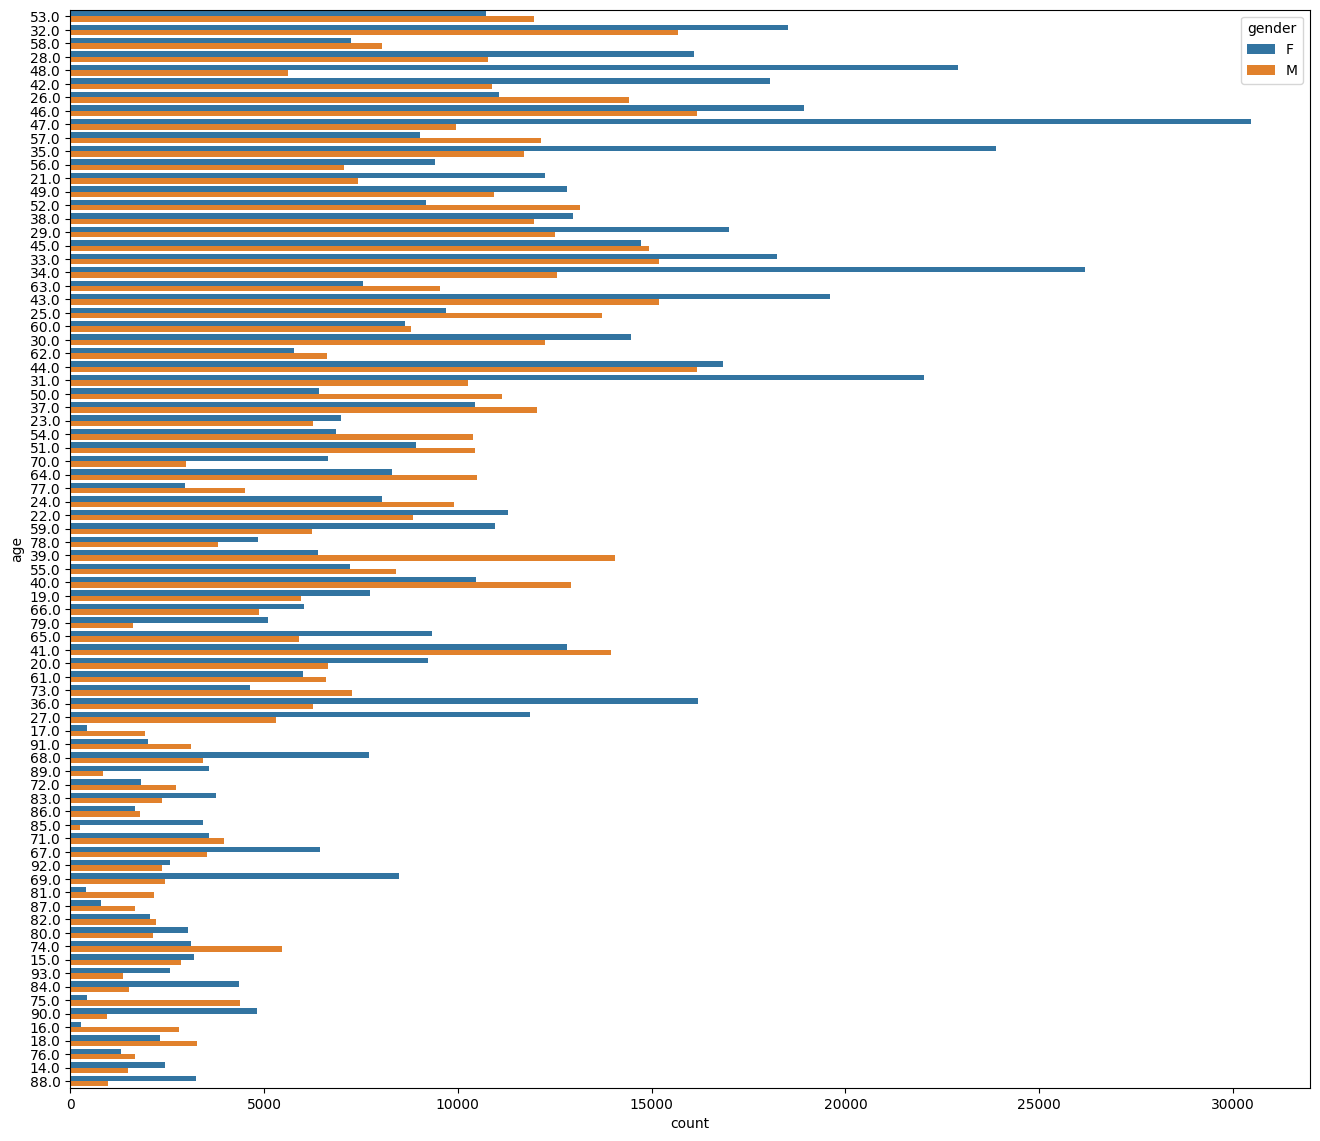

In [124]:
plot_age_again()

In [139]:
def fraud_vs_months():
    fraud_points = []
    fraud_data = train_data[train_data['is_fraud'] == 1]
    months = []
    for month in fraud_data['transaction_month'].unique():
        fraud_points.append(len(fraud_data[fraud_data['transaction_month'] == month]['transaction_month']))
        months.append(month)
    plt.plot(months,fraud_points,marker  = 'o',color= 'lime')


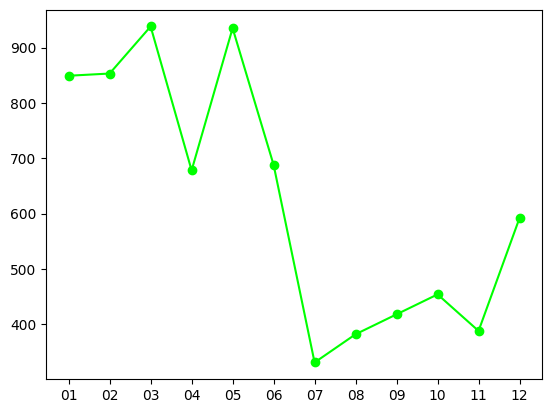

In [140]:
fraud_vs_months()

In [188]:
def fraud_vs_hour():
    count_fraud_hour = train_data[train_data['is_fraud'] == 1].transaction_hour.value_counts()
    count_fraud_hour_df = pd.DataFrame(count_fraud_hour).reset_index()
    count_fraud_hour_df.rename(columns={"index": "hour", "transaction_hour":"Number of fraud"}, inplace=True)
    count_fraud_hour_df_sort = count_fraud_hour_df.sort_values('hour', ascending=True)

    fig = plt.figure(figsize=(10,4))
    plt.plot(count_fraud_hour_df_sort.hour, 
            count_fraud_hour_df_sort['Number of fraud'],
            linestyle='--', 
            marker="s", )
    

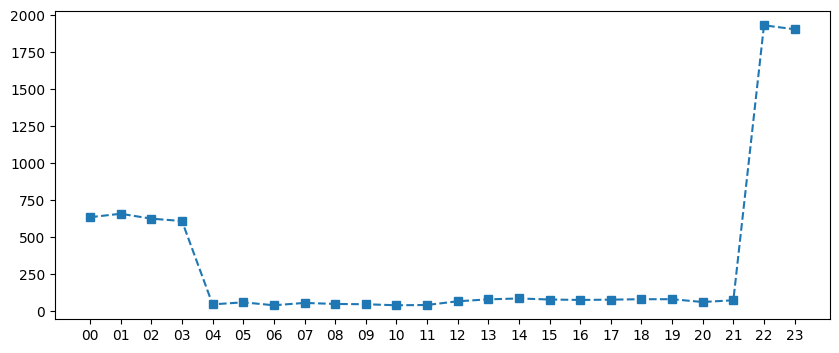

In [189]:
fraud_vs_hour()

In [190]:
columns = train_data.columns
columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'is_fraud', 'transaction_date',
       'transaction_hour', 'transaction_month', 'total_dis', 'birthday_date',
       'age'],
      dtype='object')

In [195]:
fraud_frame = train_data[train_data['is_fraud'] == 1]    

In [264]:
def pop(x):
    y = int(x)
    if y < 10000:
        return "less than 10k"
    elif y >= 10000 and y < 50000:
        return "between 10k, 50k"
    elif y >= 50000 and y < 100000:
        return "between 50k, 100k"
    elif y >= 100000 and y < 150000:
        return "between 100k, 150k"
    elif y >= 150000 and y < 300000:
        return "between 150k, 300k"
    elif y >= 300000 and y < 400000:
        return "between 300k, 400k"
    elif y >= 400000 and y < 500000:
        return "between 400k, 500k"
    elif y >= 500000 and y < 1000000:
        return "between 500k, 1m"
    else:
        return "above 1m"

In [265]:
fraud_frame['pop_ints'] = fraud_frame['city_pop'].map(lambda x : pop(x))
fraud_frame['pop_ints']

C:\Users\Acer\AppData\Local\Temp\ipykernel_1396\130904282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_frame['pop_ints'] = fraud_frame['city_pop'].map(lambda x : pop(x))


2449            less than 10k
2472                 above 1m
2523                 above 1m
2546            less than 10k
2553                 above 1m
                  ...        
1295399    between 100k, 150k
1295491    between 100k, 150k
1295532     between 50k, 150k
1295666         less than 10k
1295733     between 50k, 150k
Name: pop_ints, Length: 7506, dtype: object

In [272]:

def city_pop_vs_fraud():
    g = sns.countplot(y=fraud_frame['pop_ints'],
                  data=fraud_frame, 
                  order=["less than 10k","between 10k, 50k","between 50k, 100k","between 100k, 150k","between 150k, 300k",
                         "between 300k, 400k","between 400k, 500k","between 500k, 1m","above 1m"],
                  width=0.5)

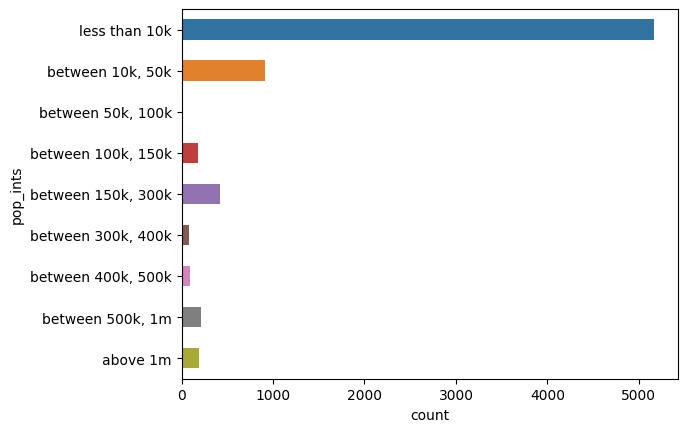

In [273]:
city_pop_vs_fraud()

In [305]:
train_data.drop('pop_ints',axis = 1,inplace=True)

In [306]:

new_train_data = pd.concat([train_data[train_data['is_fraud'] == 1],train_data[train_data['is_fraud'] == 0].sample(n= list_1[0])])

In [307]:
new_train_data.groupby('is_fraud').mean()

C:\Users\Acer\AppData\Local\Temp\ipykernel_1396\1131853686.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_train_data.groupby('is_fraud').mean()


,cc_num,amt,zip,city_pop,unix_time,total_dis,age
is_fraud,,,,,,,
0,4.207895e+17,70.681909,48703.478151,89543.154277,1.349444e+09,0.762252,45.013589
1,4.003577e+17,531.320092,48038.714229,97276.763256,1.348389e+09,0.767281,48.288836


In [312]:
test_data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'is_fraud', 'transaction_date',
       'transaction_hour', 'transaction_month', 'total_dis', 'birthday_date',
       'age'],
      dtype='object')

In [308]:
train_data.groupby('is_fraud').mean()

C:\Users\Acer\AppData\Local\Temp\ipykernel_1396\3992582261.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train_data.groupby('is_fraud').mean()


,cc_num,amt,zip,city_pop,unix_time,total_dis,age
is_fraud,,,,,,,
0,4.172901e+17,67.667110,48805.107481,88775.228137,1.349249e+09,0.765652,45.479662
1,4.003577e+17,531.320092,48038.714229,97276.763256,1.348389e+09,0.767281,48.288836


In [278]:
final_train_data = new_train_data[['category','amt','gender','zip','city_pop','transaction_hour','transaction_month','total_dis','age','is_fraud']]
final_train_data = pd.get_dummies(final_train_data, drop_first=True)

In [279]:
test_data['trans_date_trans_time'] = pd.to_datetime(test_data['trans_date_trans_time'])
test_data['trans_date_trans_time']

0        2020-06-21 12:14:25
1        2020-06-21 12:14:33
2        2020-06-21 12:14:53
3        2020-06-21 12:15:15
4        2020-06-21 12:15:17
                 ...        
555714   2020-12-31 23:59:07
555715   2020-12-31 23:59:09
555716   2020-12-31 23:59:15
555717   2020-12-31 23:59:24
555718   2020-12-31 23:59:34
Name: trans_date_trans_time, Length: 555719, dtype: datetime64[ns]

In [280]:
test_data['transaction_date'] = test_data.trans_date_trans_time.dt.strftime('%Y-%m-%d')
test_data['transaction_hour'] = test_data.trans_date_trans_time.dt.strftime('%H')
test_data['transaction_month'] = test_data.trans_date_trans_time.dt.strftime('%m')

In [281]:
test_data = test_data.drop('Unnamed: 0',axis = 1)

In [282]:
col_long = test_data['merch_long'] - test_data['long']
col_lat = test_data['merch_lat'] - test_data['lat']
final_dis = np.sqrt(col_long**2 + col_lat**2)
test_data['total_dis'] = final_dis
test_data.drop(['merch_long','merch_lat','long','lat'],axis = 1,inplace=True)

In [283]:
test_data['dob'] = pd.to_datetime(test_data['dob'])
test_data['birthday_date'] = test_data['dob'].dt.strftime('%Y-%m-%d')
test_data['age'] = (pd.to_datetime(test_data['transaction_date']) - pd.to_datetime(test_data['dob'])).astype('timedelta64[Y]')

Text(0.5, 1.0, 'before downsampling')

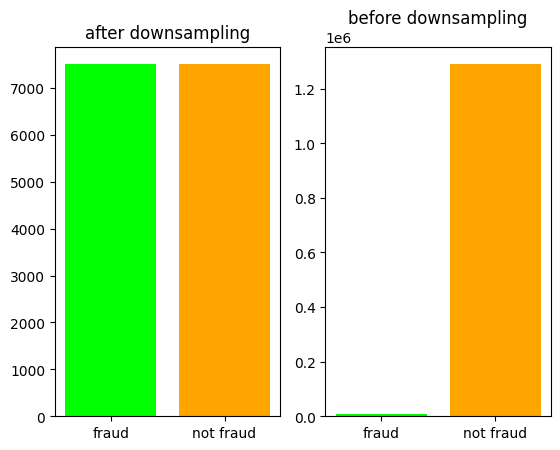

In [293]:
fig,ax = plt.subplots(1,2)
ax[0].bar(["fraud","not fraud"],[len(final_train_data[final_train_data['is_fraud'] == 1]), len(final_train_data[final_train_data['is_fraud'] == 0])],color  =['lime','orange'])
ax[1].bar(["fraud","not fraud"],[len(train_data[train_data['is_fraud'] == 1]), len(train_data[train_data['is_fraud'] == 0])],color  =['lime','orange'])
ax[0].set_title("after downsampling")
ax[1].set_title("before downsampling")

In [294]:
final_test_data = test_data[['category','amt','gender','zip','city_pop','transaction_hour','transaction_month','total_dis','age','is_fraud']]
final_test_data = pd.get_dummies(final_test_data, drop_first=True)

In [313]:
X_test.shape, X_train.shape

((555719, 48), (15012, 53))

In [303]:
new_train_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_num,unix_time,is_fraud,transaction_date,transaction_hour,transaction_month,total_dis,birthday_date,age,pop_ints
2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,...,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,1,2019-01-02,01,01,0.699298,1988-09-15,30.0,less than 10k
2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,bc7d41c41103877b03232f03f1f8d3f5,1325468849,1,2019-01-02,01,01,0.781976,1960-10-28,58.0,less than 10k
2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,b98f12f4168391b2203238813df5aa8c,1325473523,1,2019-01-02,03,01,0.412627,1960-10-28,58.0,less than 10k
2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,...,397894a5c4c02e3c61c784001f0f14e4,1325475483,1,2019-01-02,03,01,0.374262,1988-09-15,30.0,less than 10k
2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,7863235a750d73a244c07f1fb7f0185a,1325476547,1,2019-01-02,03,01,0.412760,1960-10-28,58.0,less than 10k


In [318]:
final_train_data.columns

Index(['amt', 'zip', 'city_pop', 'total_dis', 'age', 'is_fraud',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M', 'transaction_hour_01', 'transaction_hour_02',
       'transaction_hour_03', 'transaction_hour_04', 'transaction_hour_05',
       'transaction_hour_06', 'transaction_hour_07', 'transaction_hour_08',
       'transaction_hour_09', 'transaction_hour_10', 'transaction_hour_11',
       'transaction_hour_12', 'transaction_hour_13', 'transaction_hour_14',
       'transaction_hour_15', 'transaction_hour_16', 'transaction_hour_17',
       'transaction_hour_18', 'transaction_hour_19', 'transaction_hour_20',
       'transaction_hour_21', 'transaction_hour_22', 'transaction_hour_23',
  

In [319]:
final_test_data.columns

Index(['amt', 'zip', 'city_pop', 'total_dis', 'age', 'is_fraud',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M', 'transaction_hour_01', 'transaction_hour_02',
       'transaction_hour_03', 'transaction_hour_04', 'transaction_hour_05',
       'transaction_hour_06', 'transaction_hour_07', 'transaction_hour_08',
       'transaction_hour_09', 'transaction_hour_10', 'transaction_hour_11',
       'transaction_hour_12', 'transaction_hour_13', 'transaction_hour_14',
       'transaction_hour_15', 'transaction_hour_16', 'transaction_hour_17',
       'transaction_hour_18', 'transaction_hour_19', 'transaction_hour_20',
       'transaction_hour_21', 'transaction_hour_22', 'transaction_hour_23',
  

In [323]:
not_existing_cols = [c for c in final_train_data.columns.tolist() if c not in final_test_data]
# add this columns to the data frame
final_test_data = final_test_data.reindex(final_test_data.columns.tolist() + not_existing_cols, axis=1)
# new columns dont have values, replace null by 0
final_test_data.fillna(0, inplace = True)
# use the original X structure as mask for the new inference dataframe
final_test_data = final_test_data[final_train_data.columns.tolist()]

In [324]:
y_test=final_test_data['is_fraud'].values
X_test=final_test_data.drop("is_fraud", axis='columns').values
y_train=final_train_data['is_fraud'].values
X_train=final_train_data.drop("is_fraud", axis='columns').values

In [325]:
final_train_data.shape, final_test_data.shape

((15012, 54), (555719, 54))

In [327]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

method = SMOTE()
X_resampled, y_resampled = method.fit_resample(X_train, y_train)
model = LogisticRegression()
model.fit(X_resampled,y_resampled)
predicted = model.predict(X_test)
print('Classification report:', classification_report(y_test, predicted))
confusion_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', confusion_mat)
print('Share of Non-Fraud in Test Data:\n', 1-round(y_test.sum()/len(y_test),4))

Classification report:               precision    recall  f1-score   support

           0       1.00      0.93      0.96    553574
           1       0.04      0.75      0.07      2145

    accuracy                           0.93    555719
   macro avg       0.52      0.84      0.52    555719
weighted avg       1.00      0.93      0.96    555719

Confusion matrix:
 [[512481  41093]
 [   535   1610]]
Share of Non-Fraud in Test Data:
 0.9961
